In [2]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading csv and creating the dataframe
df = pd.read_csv('co2_emissions_kt_by_country.csv')

In [4]:
df.describe()

,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


After using `describe()` to see how the data behaves, we can notice that the first year recorded was 1960 and the last was 2019. It is important to notice that there is a lot of variation between the co2 emissions of different countries, with a staggering 2.78e+06 standard deviation.

In [5]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


I wanted to see how the mercosul bloc (composed of Brazil, Argentina, Paraguay and Uruguay) fares with the rest of the world in terms of emissions. Therefore, I used `.loc` to find the countries and group them by the name mercosul.

In [6]:
#catching the countries
mercosul = df.loc[df['country_name'].isin(['Brazil', 'Argentina', 'Paraguay', 'Uruguay'])]

In [7]:
mercosul.head()

,country_code,country_name,year,value
507,ARG,Argentina,1960,48815.104
508,ARG,Argentina,1961,51180.319
509,ARG,Argentina,1962,53695.881
510,ARG,Argentina,1963,50083.886
511,ARG,Argentina,1964,55727.399


In [27]:
#setting seaborn theme and palette for visualization purposes
sns.set_theme(style='darkgrid')
sns.set_palette('colorblind')

## plotting mercosul data

Before comparing the bloc with the rest of the world, it is important to notice the great disparity between the bloc itself. Big commodities exporters such as Brazil and Argentina are known to have bigger emissions than paraguay and uruguay, both of which have a small population and land. It would be interesting to know by how much.

<AxesSubplot:xlabel='year', ylabel='value'>

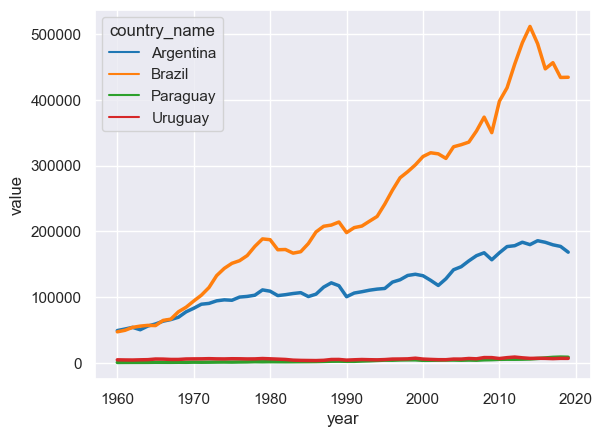

In [9]:
#lineplot of co2 emissions by year
sns.lineplot(data=mercosul, x='year', y='value', hue='country_name', palette='tab10', linewidth=2.5)

It is possible to observe that Brazilian emissions started to surge around the mid-1960s, probably due to the agricultural expansion then possible through advancements in soil fertility research. As most of Brazil's transportation is made with trucks and large vehicles, CO2 emissions would naturally rise.

Starting from 2000 we can see another upward trend in Brazilian emissions, coinciding with the start of a commodity cycle. Emissions peak in mid-2010s and then start to decline around the year Brazil went into recession. It appears Brazilian emissions are well correlated with economic growth and trade balance behaviour, and it would be interesting to see further graphs.

Still, brazilian emissions are considerably bigger than Argentina's, despite both being commodity exporters. This is probably due to more benign economic conditions in Brazil and the fact that Brazil exports more and more diverse commodities than Argentina.

In [28]:
#to visualize the gap between brazil and other emitters, it would be interesting to see co2 emissions in different years.
mercosul1991 = mercosul[mercosul['year'] == 1991]
mercosul2019 = mercosul[mercosul['year'] == 2019]

<AxesSubplot:xlabel='country_name', ylabel='value'>

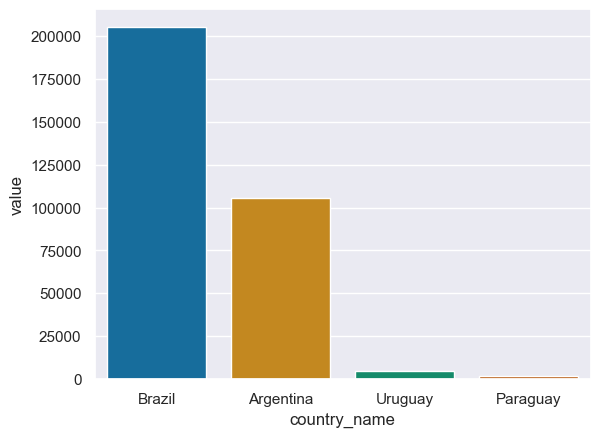

In [29]:
#barplot of 1991 mercosul data
sns.barplot(data=mercosul1991, x='country_name', y='value', order=['Brazil', 'Argentina', 'Uruguay', 'Paraguay'])

<AxesSubplot:xlabel='country_name', ylabel='value'>

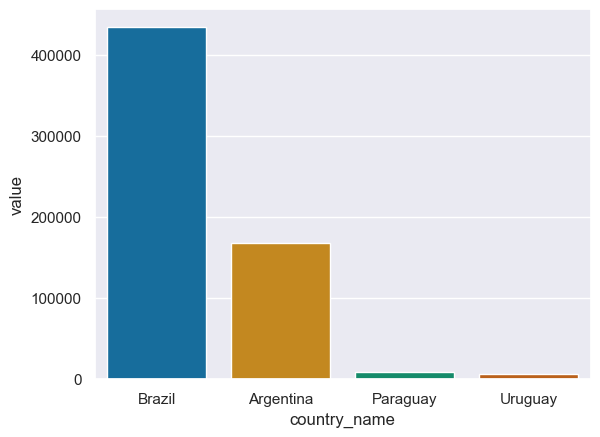

In [30]:
#barplot of 2019 mercosul data
sns.barplot(data=mercosul2019, x='country_name', y='value', order=['Brazil', 'Argentina', 'Paraguay', 'Uruguay'])

Indeed, we can notice that Argentina has yet to catch-up with Brazil's 1990s emissions. This isn't necessarily a good thing. As economic growth (at least in 2023) is intrinsically linked with energy consumption, which is also linked to hydrocarbon combustion, Argentina's case seems more of a lack of growth than greener economic policies.

In [31]:
#using a for loop to create a Mercosul bloc as if it were a country, then concatenating into the dataframe.
countries_to_sum = ['Brazil', 'Argentina', 'Paraguay', 'Uruguay']

aggregated_data = []

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    aggregated_value = year_data[year_data['country_name'].isin(countries_to_sum)]['value'].sum()
    
    aggregated_data.append({
        'country_code':'MCS',
        'country_name':'Mercosul',
        'year': year,
        'value': aggregated_value
    })

aggregated_df = pd.DataFrame(aggregated_data)
df = pd.concat([df, aggregated_df], axis=0)

In [33]:
#checking the data to see if it worked
df[df['country_name'] == 'Mercosul']

,country_code,country_name,year,value
0,MCS,Mercosul,1960,100347.455000
1,MCS,Mercosul,1961,104868.866000
2,MCS,Mercosul,1962,111795.829000
3,MCS,Mercosul,1963,110431.705000
4,MCS,Mercosul,1964,117454.010000
...,...,...,...,...
55,MCS,Mercosul,2015,683899.999142
56,MCS,Mercosul,2016,643939.990044
57,MCS,Mercosul,2017,649969.997883
58,MCS,Mercosul,2018,625899.984360


<AxesSubplot:xlabel='year', ylabel='value'>

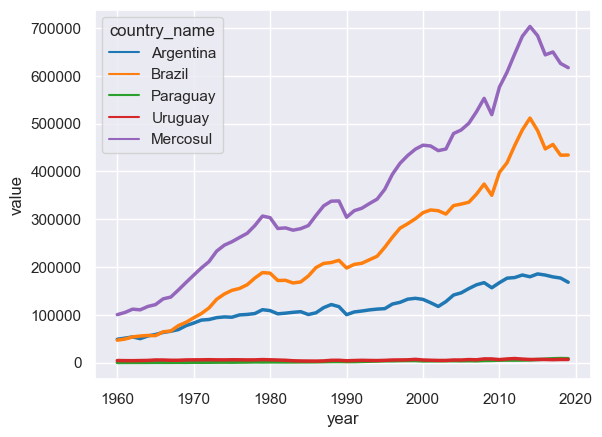

In [16]:
#creating mercosultotal, composed of the bloc's countries and the bloc itself.
mercosultotal = df.loc[df['country_name'].isin(['Brazil', 'Argentina', 'Paraguay', 'Uruguay', 'Mercosul'])]

#lineplot comparing total mercosul emissions and each countries' co2 emissions
sns.lineplot(data=mercosultotal, x='year', y='value', hue='country_name', palette='tab10', linewidth=2.5)

Still, Mercosul's total emissions seems to be reflecting most of the patterns from Brazilian emissions, highlighting the importance of a quality green transition in Brazil.

To compare the bloc with the rest of the world, I noticed that there was different kinds of groupings in the dataset, such as countries aggregated by income level or location. I had to do some improv coding (as it is possible to note that I dropped rows based both on country_names and country_code.)

In [34]:
#removing other groupings and checking data
countries_to_drop = ['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only', 'Upper middle income',
                    'Late-demographic dividend', 'East Asia & Pacific', 'High income', 'OECD members', 'Post-demographic dividend',
                    'East Asia & Pacific (excluding high income)', 'East Asia & Pacific (IDA & IBRD countries)',
                    'Europe & Central Asia', 'Early-demographic dividend', 'Europe & Central Asia (IDA & IBRD countries)',
                    'Europe & Central Asia (excluding high income)', 'North America', 'Lower middle income', 'South Asia',
                    'South Asia (IDA & IBRD)', 'Middle East & North Africa', 'Latin America & the Caribbean (IDA & IBRD countries only)',
                    'Arab World', 'Euro area', 'Latin America & Caribbean']
codes_to_drop = ['TLA', 'MNA', 'TMN', 'LAC', 'IDA', 'SSF', 'TSS', 'SSA', 'FCS', 'CEB', 'AFE', 'PRE', 'IDB', 'IDX', 'LDC']
df1 = df[~df['country_name'].isin(countries_to_drop)]
dfpaises = df1[~df1['country_code'].isin(codes_to_drop)]
dfpaises.sort_values(ascending=False, by='value')

,country_code,country_name,year,value
2159,CHN,China,2019,1.070722e+07
2158,CHN,China,2018,1.050293e+07
2157,CHN,China,2017,1.009601e+07
2154,CHN,China,2014,1.000667e+07
2153,CHN,China,2013,9.984570e+06
...,...,...,...,...
9981,PLW,Palau,1991,0.000000e+00
8321,MLI,Mali,1996,0.000000e+00
4229,FSM,"Micronesia, Fed. Sts.",1990,0.000000e+00
9980,PLW,Palau,1990,0.000000e+00


<AxesSubplot:xlabel='value', ylabel='country_name'>

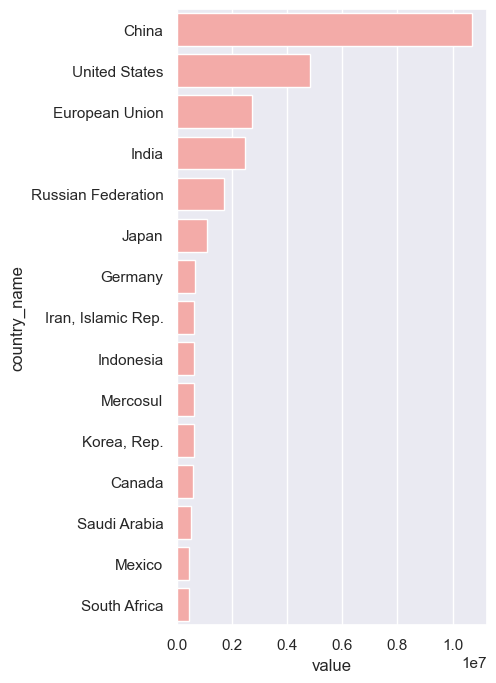

In [18]:
#filtering emissions by country based on the last date available
dfpaises2019 = dfpaises[dfpaises['year'] == 2019]
top15_2019 = dfpaises2019.sort_values(by='value', ascending=False).head(15)

#matplotlib figure
f, ax = plt.subplots(figsize=(4,8))

#colors and barplot
sns.set_color_codes('pastel')
sns.barplot(data=top15_2019, x='value', y='country_name', color='r')

Comparing the bloc's emissions with the world's top emitters we can notice the great disparity between co2 emissions, with China and the United States being the largest polluters worldwide. Mercosul sits next to a lot of countries in terms of emissions, such as Germany, South Korea, Canada and Iran, each with its own characteristics.

Text(2014, 2500000, 'India')

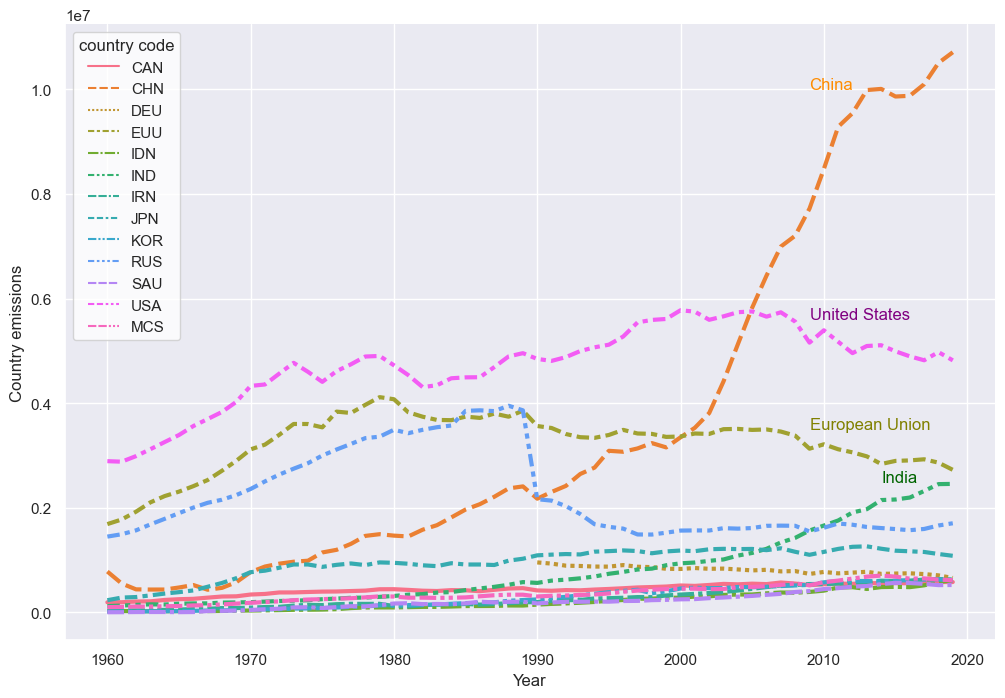

In [19]:
#filtering countries based top latest emissions
top_paises = ['China', 'United States', 'European Union', 'India', 'Russian Federation', 'Japan', 'Germany',
             'Iran, Islamic Rep.', 'Indonesia', 'Mercosul', 'Korea, Rep.', 'Canada', 'Saudi Arabia']

historico_emissoes = dfpaises[dfpaises['country_name'].isin(top_paises)]

#matplotlib figure size
f, ax2 = plt.subplots(figsize=(12,8))

#line plot
sns.lineplot(data=historico_emissoes, x='year', y='value', hue='country_code', style='country_code',
             palette='husl', linewidth=3)

#seaborn style and palette
sns.set_style('white')
sns.set_palette('dark')

#label of x and y variables and legend
ax2.legend(title='country code')
ax2.set_ylabel('Country emissions')
ax2.set_xlabel('Year')
sns.despine(top=True, right=True, left=False, bottom=False)

#annotation of top emitters to facilitate viewing
ax2.annotate('China', xy=(2013, 10000000), xytext=(2009,10000000), color='darkorange')
ax2.annotate('United States', xy=(2013, 7000000), xytext=(2009,5600000), color='purple')
ax2.annotate('European Union', xy=(2013, 5000000), xytext=(2009,3500000), color='olive')
ax2.annotate('India', xy=(2017, 5000000), xytext=(2014,2500000), color='darkgreen')

In this lineplot we can notice China's rise in terms of emissions, starting a huge upward trend in the 2000's. In terms of CO2 emissions, it is important to notice that EU and US have already peaked and are slowly drifting downwards. India and China are yet to peak.

The rest of the top emitting countries sit well below the biggest emitters, Mercosul included.